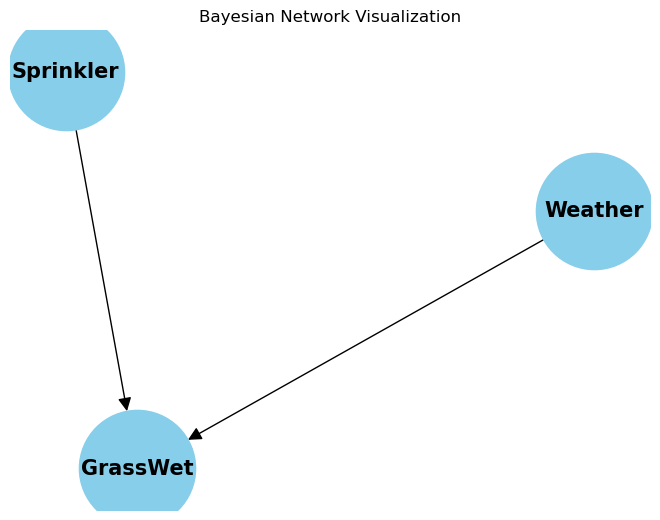

+-------------+-----------------+
| GrassWet    |   phi(GrassWet) |
+=============+=================+
| GrassWet(0) |          0.4939 |
+-------------+-----------------+
| GrassWet(1) |          0.5061 |
+-------------+-----------------+


In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

# Step 2: Defining the model structure. We define the following structure:
# Weather -> GrassWet <- Sprinkler
model = BayesianModel([('Weather', 'GrassWet'), ('Sprinkler', 'GrassWet')])

# Step 3: Generating some synthetic data
data = pd.DataFrame(np.random.randint(low=0, high=2, size=(1000, 3)), columns=['Weather', 'Sprinkler', 'GrassWet'])

# Learning CPDs using Maximum Likelihood Estimators
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Step 4: Visualization of the model
G = nx.DiGraph()
G.add_edges_from(model.edges())
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=7000, node_color='skyblue', font_size=15, font_weight='bold', arrowstyle='-|>', arrowsize=20)

plt.title('Bayesian Network Visualization')
plt.show()

# Step 5: Doing some inference
inference = VariableElimination(model)
prob_GrassWet = inference.query(variables=['GrassWet'], evidence={'Weather': 1})

print(prob_GrassWet)

